<a href="https://colab.research.google.com/github/Nardos-Amakele/Quadratic/blob/main/Quadratic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import Libraries & Define the Function

Imported matplotlib.pyplot for plotting and `random` to generate random starting points and defined the quadratic function f(x) = x² - 4


In [25]:
# Import necessary libraries
import matplotlib.pyplot as plt
import random

# Define the quadratic function
def f(x):
    return x**2 - 4


### Step 2: Define the Hill Climbing Function

This process starts at a point and tries to move left or right to keep the value of `|f(x)|` as small as possible, hoping to find a root of the equation.
It maps out the steps so we will be able to see the process of optimization later on.

In [31]:
def hill_climb(start_x, step_size=0.1, max_iters=100):
    x = start_x
    history = [(x, abs(f(x)))]

    for _ in range(max_iters):
        left = x - step_size
        right = x + step_size
        f_current = abs(f(x))
        f_left = abs(f(left))
        f_right = abs(f(right))

        if f_left < f_current:
            x = left
        elif f_right < f_current:
            x = right
        else:
            break  # If no better neighbor is found

        history.append((x, abs(f(x))))

    return x, history


###. Step 3: Try Multiple Starting Points

Since a quadratic equation can have more than one root, I performed the hill climbing from 5 different random starting points.  
The results are stored and also rounded to 1 decimal place since we can find multiple approximations of the same root.
Then, display the rounded roots found.


In [32]:
roots = set()
all_histories = []

for i in range(5):
    start_point = random.uniform(-5, 5)
    solution, steps = hill_climb(start_point)
    root_rounded = round(solution, 1)  # Round to 1 decimal place to group near-identical roots
    roots.add(root_rounded)
    all_histories.append((start_point, solution, steps))

print("Estimated roots found:", roots)


Estimated roots found: {2.0, -2.0}


### Step 4: Plot the Convergence Paths

Each trial is visualized so as to observe how each trial moved toward reducing the function's value to zero (a root).


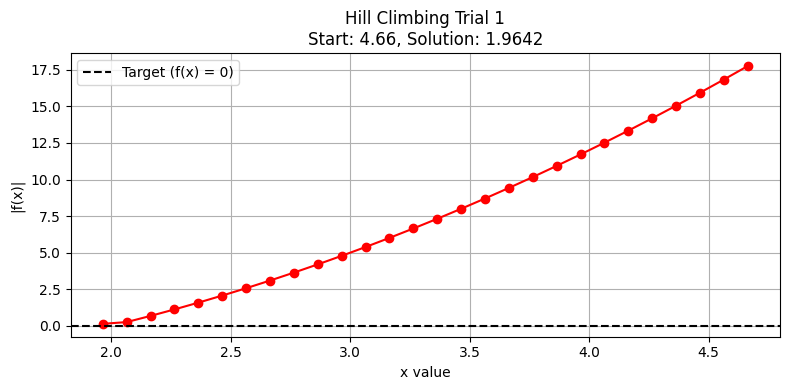

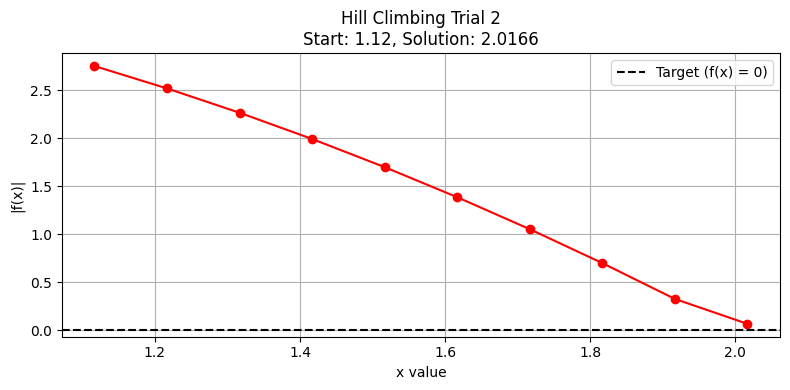

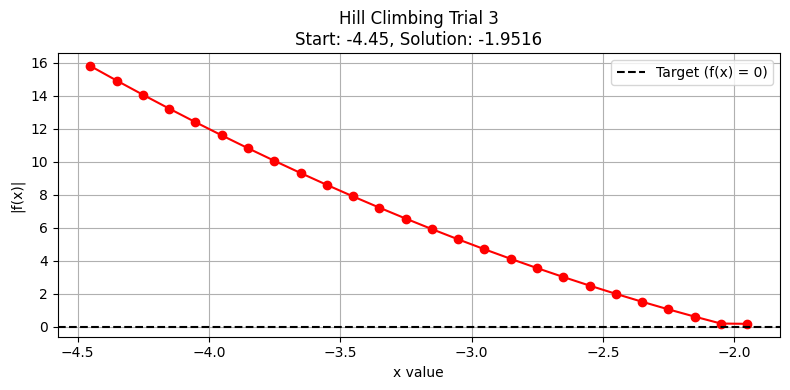

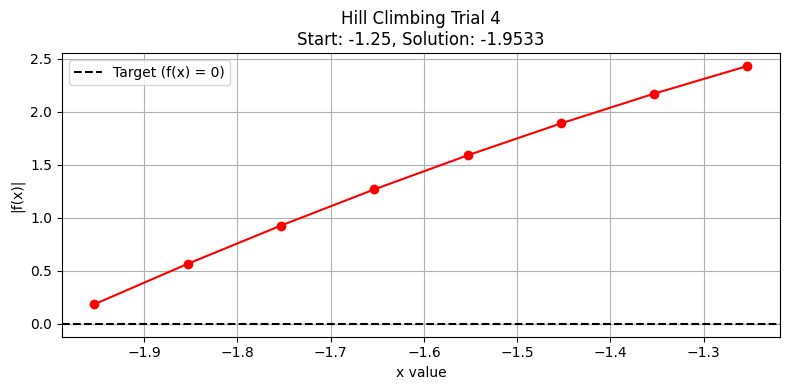

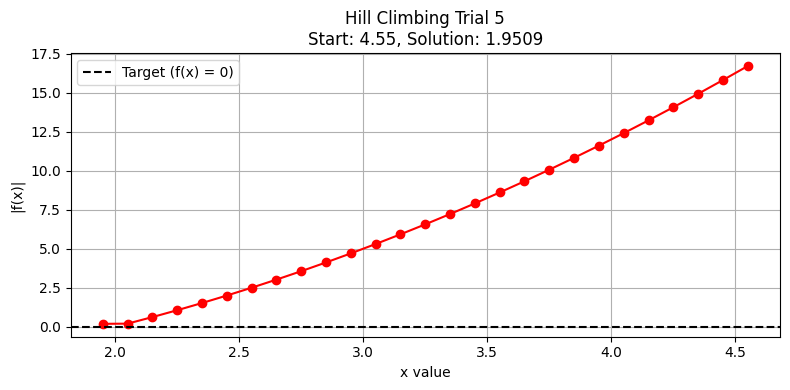

In [33]:
for i, (start, solution, steps) in enumerate(all_histories):
    x_vals = [x for x, y in steps]
    y_vals = [y for x, y in steps]

    plt.figure(figsize=(8, 4))
    plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='red')
    plt.axhline(y=0, color='black', linestyle='--', label="Target (f(x) = 0)")
    plt.title(f"Hill Climbing Trial {i+1}\nStart: {start:.2f}, Solution: {solution:.4f}")
    plt.xlabel("x value")
    plt.ylabel("|f(x)|")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
